In [22]:
library(ggplot2)
library(Hmisc)
source("../utilis/utilis.R")
library(glue)
library(dplyr)

In [23]:
threshold = 1
cutoff_column = 'pval'
data_df_path =  '../../../output/heatmap_LMSD_isotopes_also_wtMS2/feat_table_LMSD_isotopes_also_wtMS2.csv'
meta_df_path =  '../../../../seq/RPneg_addgrp.csv'

# Prepare the data

## Read and transform the data table and metadata table

In [24]:
PS_df = read.csv(data_df_path)
meta_df = read.csv(meta_df_path)

----

In [25]:
grepl('(Tn|CD8stem|CD8TD|CD8trans)\\_[0-9]+',colnames(PS_df))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [26]:
data_df = PS_df[grepl('(Tn|CD8stem|CD8TD|CD8trans)\\_[0-9]+',colnames(PS_df))]

In [27]:
head(data_df)

,CD8TD_750K_1,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21.70920,21.56912,22.12183,21.67776,22.07978,21.68351,22.07871,21.71085
2,22.50262,22.55900,22.26737,22.45372,22.20622,22.48106,21.90982,21.97588
3,19.57818,18.57885,19.85039,19.53337,19.75052,18.94896,19.55693,19.59125
4,25.52216,25.59381,24.64683,24.37383,25.20658,24.86240,25.06763,25.14544
5,23.06627,23.15258,22.58825,22.27510,22.38907,22.70485,22.53539,22.48994
6,22.63770,21.98507,21.91985,21.44722,21.89120,21.21802,21.77268,21.63894


----

In [28]:
head(meta_df)

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
1,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
2,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
3,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,NR,Blank_std,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A2,2
4,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
5,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
6,Unknown,MT_20230308_006,pooledsample_02,pooled_1,NA,pooled,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A4,5


In [29]:
rownames(meta_df) = meta_df$Sample_ID_upd

----

In [30]:
# lookUpAnnot <- function(annot_df,
#                         FeatureID,
#                         look4column = '') {
#     output = annot_df[annot_df[,'id_number'] == FeatureID,look4column]
#     return(output)
# }

# lookUpAnnot(annot_df,'F8342','Species.Shorthand')

## Transform and merge data

In [31]:
source('../utilis/utilis.R')
transform_merge_data4violin <- function(df = df,
                                 meta_df = meta_df,
                                 class_column = 'group',
                                 cutoff_column = 'padj', 
                                 threshold = threshold) {
    
    df_filt <- df[df[,cutoff_column] < threshold,
              colnames(df)[grepl('(Tn|CD8stem|CD8TD|CD8trans)\\_[0-9]+',colnames(df))]] # 
    df_filt.T <- t(df_filt)
    # print(head(df_filt.T))
    merged_df = merge_by_rowName(meta_df,df_filt.T, all.y = TRUE)
    merged_df[,class_column] = factor(
        merged_df[,class_column],
        level = c('Tn',
                  'CD8stem',
                  'CD8trans',
                  'CD8TD')
    )
    return(merged_df)
}

In [32]:
merged_df <- transform_merge_data4violin(df = PS_df,
                                         meta_df = meta_df,
                                         class_column = 'group',
                                         cutoff_column = 'pval', 
                                         threshold = threshold)

In [33]:
colnames(merged_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"          
[13] "1"                 "2"                 "3"                
[16] "4"                 "5"                 "6"                
[19] "7"                 "8"                 "9"                
[22] "10"                "11"                "12"               
[25] "13"                "14"                "15"               
[28] "16"                "17"                "18"               
[31] "19"                "20"                "21"               
[34] "22"                "23"                "24"               
[37] "25"                "26"                "27"               
[40] "28"                "29"                "30"

# Output directory

In [34]:
output_dir = "../../../output/box_PS_sum_LMSD_isotopes_also_wtMS2/"
dir.create(output_dir)

In [35]:
ncol(meta_df)

[1] 12

In [36]:
merged_df[1:5,ncol(meta_df):ncol(merged_df)]

,Inj.Vol,1,2,3,4,5,6,7,8,9,⋯,21,22,23,24,25,26,27,28,29,30
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD8stem_250K_1,5,22.12183,22.26737,19.85039,24.64683,22.58825,21.91985,23.53582,24.73615,21.57519,⋯,20.79985,21.78533,22.32201,23.41720,22.43039,23.11949,20.38968,21.75753,23.65895,23.45871
CD8stem_300K_2,5,21.67776,22.45372,19.53337,24.37383,22.27510,21.44722,23.07785,24.45925,21.59000,⋯,21.90277,21.56251,21.83128,23.22504,22.35114,22.97114,20.17626,21.51895,23.54300,23.30801
CD8TD_750K_1,5,21.70920,22.50262,19.57818,25.52216,23.06627,22.63770,23.27347,25.86821,22.87180,⋯,22.09891,22.25444,23.48140,24.25179,23.57725,25.28782,21.33465,22.59071,24.63145,24.17652
CD8TD_750K_2,5,21.56912,22.55900,18.57885,25.59381,23.15258,21.98507,22.55316,25.90637,22.94557,⋯,22.24730,22.17371,23.43825,23.94703,23.25860,23.34149,21.24636,21.88663,24.46338,24.35690
CD8trans_250K_2,5,22.07978,22.20622,19.75052,25.20658,22.38907,21.89120,23.17353,24.85705,22.03361,⋯,20.08701,21.82710,22.55280,23.40729,22.60755,22.90955,21.01736,21.54352,23.58961,23.82399


In [37]:
rowsums = rowSums(2^(merged_df[,(ncol(meta_df)+1):ncol(merged_df)]))

In [38]:
merged_df[,3:5]

,Sample.ID,Sample_ID_upd,cell_number
,<chr>,<chr>,<chr>
CD8stem_250K_1,CD8T_stem_250k_01_02,CD8stem_250K_1,250000
CD8stem_300K_2,CD8T_stem_300k_01_02,CD8stem_300K_2,300000
CD8TD_750K_1,CD8T_TD_750k_01_02,CD8TD_750K_1,750000
CD8TD_750K_2,CD8T_TD_750k_01_02,CD8TD_750K_2,750000
CD8trans_250K_2,CD8T_trans_250k_01_02,CD8trans_250K_2,250000
CD8trans_350K_1,CD8T_trans_350k_01_02,CD8trans_350K_1,350000
Tn_250K_1,Naive_250k_01_02,Tn_250K_1,250000
Tn_250K_2,Naive_250k_02_02,Tn_250K_2,250000


In [39]:
PSsum_df = merged_df[,3:7] # 
PSsum_df$PS_sum = rowsums

In [40]:
PSsum_df

,Sample.ID,Sample_ID_upd,cell_number,group,Comment,PS_sum
,<chr>,<chr>,<chr>,<fct>,<int>,<dbl>
CD8stem_250K_1,CD8T_stem_250k_01_02,CD8stem_250K_1,250000,CD8stem,1,435463636
CD8stem_300K_2,CD8T_stem_300k_01_02,CD8stem_300K_2,300000,CD8stem,1,393865940
CD8TD_750K_1,CD8T_TD_750k_01_02,CD8TD_750K_1,750000,CD8TD,1,867853635
CD8TD_750K_2,CD8T_TD_750k_01_02,CD8TD_750K_2,750000,CD8TD,1,824884485
CD8trans_250K_2,CD8T_trans_250k_01_02,CD8trans_250K_2,250000,CD8trans,1,543816713
CD8trans_350K_1,CD8T_trans_350k_01_02,CD8trans_350K_1,350000,CD8trans,1,443488981
Tn_250K_1,Naive_250k_01_02,Tn_250K_1,250000,Tn,1,325306974
Tn_250K_2,Naive_250k_02_02,Tn_250K_2,250000,Tn,1,333887659


# Wrapper Function: plot a single box plot

In [41]:
box_plot <- function(long_df = merged_df,
                        x = 'group',
                        y = var,
                        xlab = xlab,
                        ylab = ylab,
                        fill_color = 'group',
                        fig_width = 8,
                        fig_height = 8,
                        text_size = 20,
                        legend_size = 20,
                        axis_title_size = 20,
                        output_dir = "",
                        pdf_prefix = 'test',
                        show_plot = TRUE) {
    
    options(repr.plot.width = fig_width, repr.plot.height = fig_height)

    p <- ggplot(long_df, aes_string(x = x, y = y, fill = fill_color)) + 
        geom_boxplot(outlier.shape = NA) +
        xlab(xlab) + ylab(ylab) + 
        geom_jitter(alpha = 1) +
        scale_fill_manual(values = c("#888888","#0000ff","#FFA500","#ff0000")) +  #

        # set transparency
        # https://ggplot2.tidyverse.org/reference/theme.html
        theme(
          panel.grid.major = element_line(colour = "grey50",linetype = "dashed", size = 0.2),
          panel.border = element_rect(fill = NA),
          #panel.grid.minor = element_blank(),
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA),
          axis.text = element_text(size = text_size, colour="black"),
          axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5, colour="black"),
          legend.text= element_text(size = legend_size),
          legend.title = element_text(size = legend_size),
          axis.title = element_text(size = axis_title_size)
        )
    if (show_plot == TRUE) {
        print(p) # display the plot
    } else {return(p)}

    if (length(output_dir)!=0) {
            ggsave(file.path(output_dir, paste0("ggplot_boxplot_",pdf_prefix,".pdf")), width = fig_width, height = fig_height)
        }
}

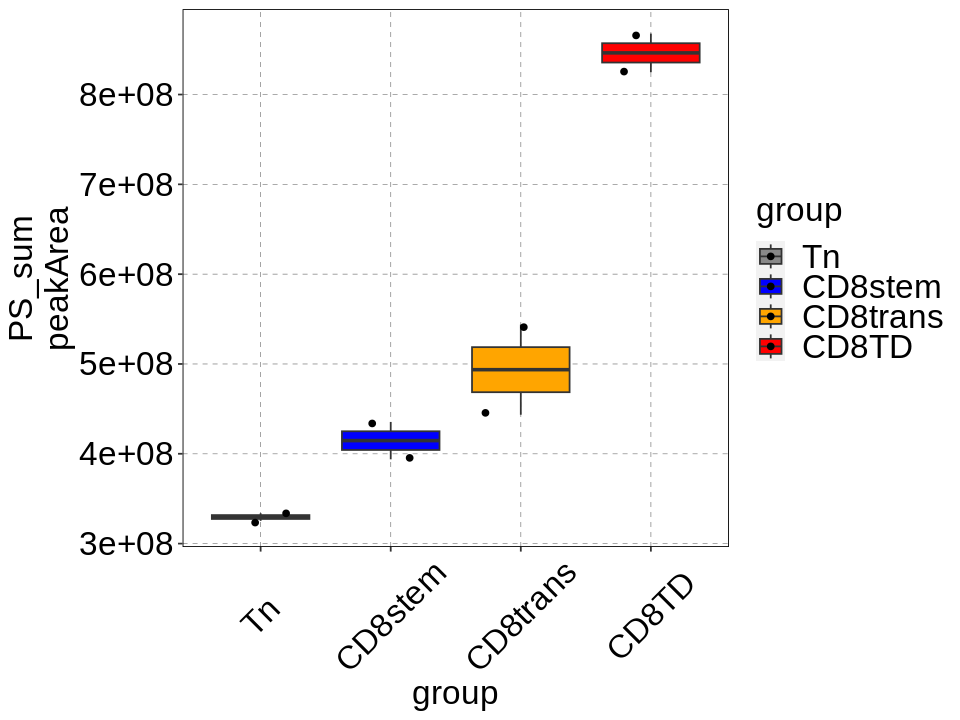

In [42]:
var = 'PS_sum'
box_plot(long_df = PSsum_df,
            x = 'group',
            y = var,
            xlab = 'group',
            ylab = glue('{var}\npeakArea'),
            fill_color = 'group',
            fig_width = 8,
            fig_height = 6,
            text_size = 20,
            legend_size = 20,
            axis_title_size = 20,
            output_dir = output_dir,
            pdf_prefix = 'PS_sum_RPneg')